# Plotting with xarray

The xarray library has an inbuilt `plot` function that is a thin wrapper around the [matplotlib library](https://matplotlib.org).

The [documentation of the xarray plot function is excellent](http://xarray.pydata.org/en/stable/plotting.html). Read it for an in-depth explanation of the power of the xarray plotting functionality. This notebook covers just enough to get started and make use of plots in subsequent tutorials.

As xarray dataarrays contain all the associated metadata and coordinates for the data, it can create informative plots with very little effort.

First step is to import xarray

In [1]:
import xarray

Next step is to use a [jupyter "magic" function](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that causes matplotlib figures to be displayed within the notebook 

In [2]:
%matplotlib inline

Now open the same dataset as before

In [3]:
ds = xarray.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')

It is the `xarray.DataArray` that has a `plot` method defined, it does not work on an `xarray.Dataset`. So to plot the first time step of `tas`:

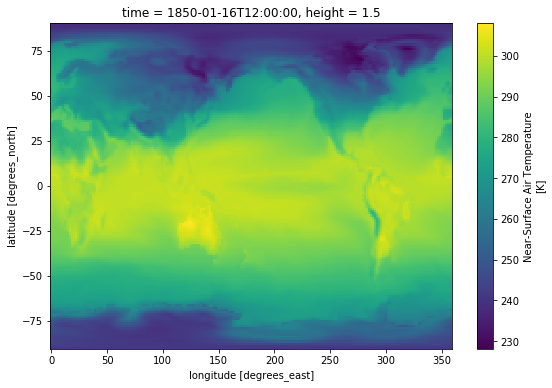

In [4]:
tas = ds.tas
tas.isel(time=0).plot(size=6)

Operator chaining means it is possible to have multiple selection operators and add `.plot` to the end to visualise the result

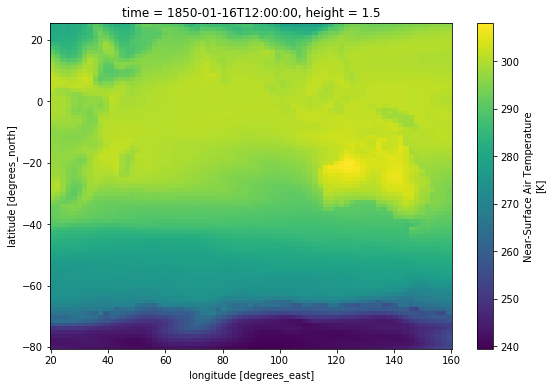

In [5]:
tas.isel(time=0).sel(lon=slice(20,160), lat=slice(-80,25)).plot(size=6)

xarray will automatically guess the type of plot based on the dimensionality of the data being plotted. If passed too many dimensions `xarray` will default to displaying a histogram

(array([  4534.,  13524.,  13211.,  18105.,  16757.,  18695.,  61065.,
         77034., 220789.,  15286.]),
 array([205.5402 , 216.309  , 227.07782, 237.84662, 248.61542, 259.38422,
        270.153  , 280.92184, 291.69064, 302.45944, 313.22824],
       dtype=float32),
 <a list of 10 Patch objects>)

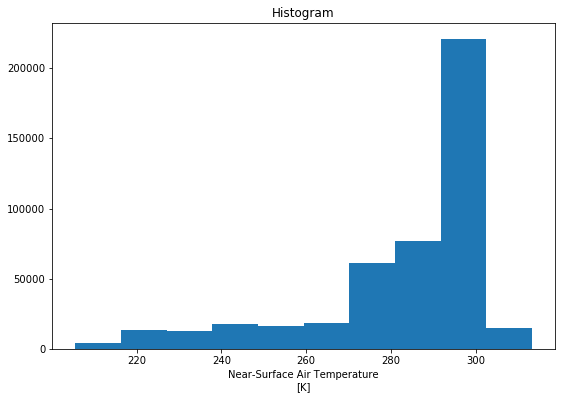

In [6]:
tas.sel(time=slice('1871-01','1876-12'), lon=slice(20,160), lat=slice(-80,25)).plot(size=6)

Reduce the dimensionality enough and it will plot a line. For example, a time series of near surface temperatures in Brisbane (Note: this is selecting a single point, so `sel` requires either an exact location that exists in the data, or to specify `method` argument to tell it how to choose a location from the data)

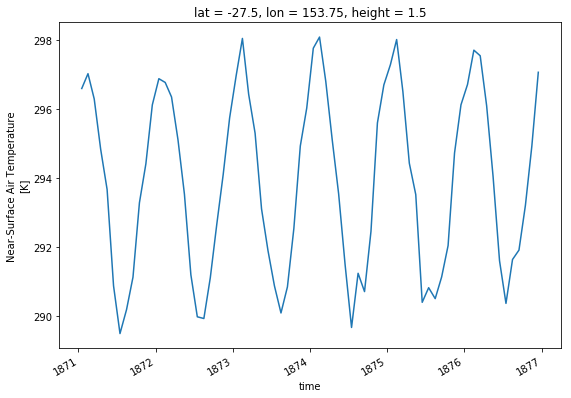

In [7]:
tas.sel(time=slice('1871-01','1876-12')).sel(lat=-27.47, lon=153.03, method='nearest').plot(size=6)

Now open a new dataset from the same collection, this is the air temperature data but at all pressure levels

In [8]:
ds_air = xarray.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/ta/ta_Amon_ACCESS1-3_historical_r1i1p1_185001-189912.nc')

In [9]:
ds_air

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, plev: 17, time: 600)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 1899-12-16T12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    plev_bnds  (plev, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes:
    institution:                     CSIRO (Commonwealth Scientific and Indus...
    institute_id:                    CSIRO-BOM
    experiment_id:                   historical
    source:                          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N...
    model_id:                        ACCESS1.3
   

Select out the air temperature data variable

In [10]:
ta = ds_air.ta
ta

<xarray.DataArray 'ta' (time: 600, plev: 17, lat: 144, lon: 192)>
[282009600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 1899-12-16T12:00:00
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    standard_name:     air_temperature
    long_name:         Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-03-23T01:31:12Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

Selecting out the first time index and the longitude corresponding to the Himalayas and plot gives a vertical profile of the atmosphere from pole to pole. Note the `yincrease=False` option was used for the plot to invert the y-axis as pressure decreases with height

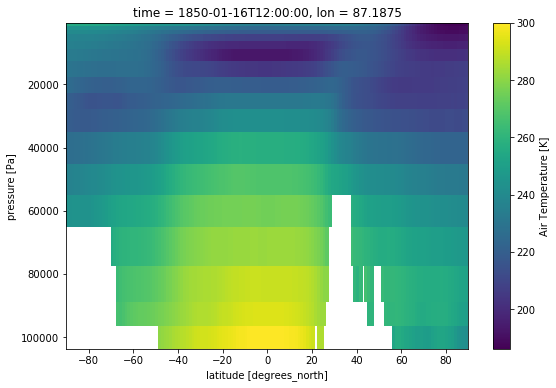

In [11]:
ta.isel(time=0).sel(lon=86.93, method='nearest').plot(size=6, yincrease=False)